In [ ]:
# The following libraries will let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations
import pandas as pd # dataframes
#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks

In [2]:
def face_detect(photo, scaleFactor=1.1, minNeighbors=5, facecolor =(255,0,0), eyecolor =(0,255,0), smilecolor =(0,0,255), thickness=2, smilescale = 2, eyescale = 4):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    #person_grey = cv2.GaussianBlur(person_grey, (5, 5),0)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    max_width = 0
    max_height = 0
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), facecolor, thickness)
        max_width = w if w > max_width else max_width
        max_height = h if h > max_height else max_height

    smile_max_width = int(max_width / smilescale)
    smile_max_height = int(max_height / smilescale)
    smile = smile_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors, maxSize=(smile_max_width,smile_max_height))
    for (x, y, w, h) in smile:
        cv2.rectangle(photo, (x, y), (x+w, y+h), smilecolor, thickness)

    eyes_max_width = int(max_width / eyescale)
    eyes_max_height = int(max_height / eyescale)
    eyes = eyes_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors, maxSize=(eyes_max_width,eyes_max_height))
    for (x, y, w, h) in eyes:
        cv2.rectangle(photo, (x, y), (x+w, y+h), eyecolor, thickness)

    cv2.putText(photo,'Face', (0,15), cv2.FONT_HERSHEY_PLAIN, 1, facecolor, 1)
    cv2.putText(photo,'Smile', (0,30), cv2.FONT_HERSHEY_PLAIN, 1, smilecolor, 1)
    cv2.putText(photo,'Eyes', (0,50), cv2.FONT_HERSHEY_PLAIN, 1, eyecolor, 1)

    plt.imshow(photo)

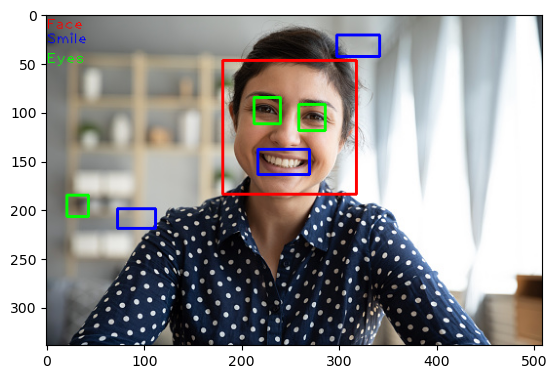

In [3]:
face_detect(cv2.imread('Day 2_Programming Lab_Person.jpg'))

In [ ]:
def mouth_prop(photo, scaleFactor=1.1, minNeighbors=5):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    n = 0
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), [255,0,0], 1)
        n += 1
        print(f"Face {n}")
        smile = smile_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        for (xs, ys, ws, hs) in smile:
            cv2.rectangle(photo, ((x+xs), (y+ys)), ((x+xs+ws), (y+ys+hs)), [0,255,0], 1)
            smile_proportion = ws / w
            smile_proportion_height = hs / h
            print(f"Smile width proportion: {smile_proportion:.2f}")
            print(f"Smile height proportion: {smile_proportion_height:.2f}")
    plt.imshow(photo)

Face 1
Smile width proportion: 0.52
Smile height proportion: 0.26


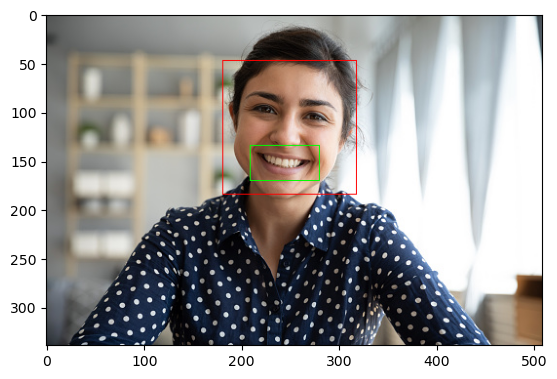

In [28]:
mouth_prop(cv2.imread('Day 2_Programming Lab_Person.jpg'), 1.1, 5)

In [ ]:
def eye_prop(photo, scaleFactor=1.1, minNeighbors=5):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    n = 0
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), [255,0,0], 1)
        n += 1
        print(f"Face {n}")
        eye = eye_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        for (xs, ys, ws, hs) in eye:
            cv2.rectangle(photo, ((x+xs), (y+ys)), ((x+xs+ws), (y+ys+hs)), [0,255,0], 1)
            eye_proportion = ws / w
            eye_proportion_height = hs / h
            print(f"Eye width proportion: {eye_proportion:.2f}")
            print(f"Eye height proportion: {eye_proportion_height:.2f}")
    plt.imshow(photo)

Face 1
Eye width proportion: 0.28
Eye height proportion: 0.28
Eye width proportion: 0.27
Eye height proportion: 0.27


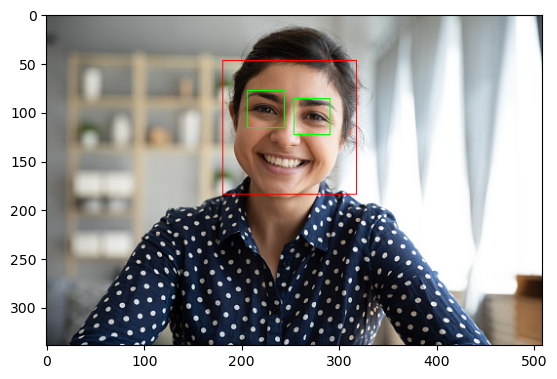

In [30]:
eye_prop(cv2.imread('Day 2_Programming Lab_Person.jpg'), 1.1, 5)

In [ ]:
def proportions(photo, scaleFactor=1.1, minNeighbors=5):
    person_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(person_grey, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    n = 0
    data = pd.DataFrame(columns=['Face', 'Face_x', 'Face_y', 'Face_w', 'Face_h', 'Smile_x', 'Smile_y', 'Smile_w', 'Smile_h', 'Eye1_x', 'Eye1_y', 'Eye1_w', 'Eye1_h', 'Eye2_x', 'Eye2_y', 'Eye2_w', 'Eye2_h'])
    for (x, y, w, h) in faces:
        cv2.rectangle(photo, (x, y), (x+w, y+h), [255,0,0], 1)
        n += 1
        data.loc[n, 'Face'] = n
        smile = smile_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        data.loc[n, ['Face_x', 'Face_y', 'Face_w', 'Face_h']] = [x, y, w, h]
        for (xs, ys, ws, hs) in smile:
            data.loc[n, ['Smile_x', 'Smile_y', 'Smile_w', 'Smile_h']] = [x+xs, y+ys, ws, hs]
            eye = eye_cascade.detectMultiScale(person_grey[y:(y+h), x:(x+w)], scaleFactor=scaleFactor, minNeighbors=minNeighbors)
            for (xe, ye, we, he) in eye:
                if pd.isna(data.loc[n, 'Eye1_x']):
                    data.loc[n, ['Eye1_x', 'Eye1_y', 'Eye1_w', 'Eye1_h']] = [x+xe, y+ye, we, he]
                elif pd.isna(data.loc[n, 'Eye2_x']):
                    data.loc[n, ['Eye2_x', 'Eye2_y', 'Eye2_w', 'Eye2_h']] = [x+xe, y+ye, we, he]
    return(data)

In [44]:
facial_data = proportions(cv2.imread('Day 2_Programming Lab_Person.jpg'), 1.1, 5)

facial_data

,Face,Face_x,Face_y,Face_w,Face_h,Smile_x,Smile_y,Smile_w,Smile_h,Eye1_x,Eye1_y,Eye1_w,Eye1_h,Eye2_x,Eye2_y,Eye2_w,Eye2_h
1,1,181,47,137,137,209,134,71,36,206,78,38,38,254,86,37,37
